In [169]:
import tensorflow as tf
from tensorflow  import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2
from random import *
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

In [154]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

In [155]:
print("The x_train size is {}".format(x_train.shape))
print("The y_train size is {}".format(y_train.shape))
print("The x_test size is {}".format(x_test.shape))
print("The y_test size is {}".format(y_test.shape))

The x_train size is (60000, 28, 28)
The y_train size is (60000,)
The x_test size is (10000, 28, 28)
The y_test size is (10000,)


60 000 images composes the train dataset. The image size is 28 pixels (width) x 28 pixels (heigth).

In [156]:
print(x_train[0])
print("\n")
print("The min of train set is {}".format(np.amin(x_train)))
print("The max of train set is {}".format(np.amax(x_train)))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

The first image of train dataset is composed of 28x28=784 pixels. Each pixel can take an integer value between 0 and 255.

In [157]:
print(y_train[:100])
print("The min of train label is {}".format(np.amin(y_train)))
print("The max of train label is {}".format(np.amax(y_train)))

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 9 3 3 0 7 4 9 8 0 9 4 1 4 4 6 0 4 5 6 1 0 0 1 7 1 6
 3 0 2 1 1 7 9 0 2 6 7 8 3 9 0 4 6 7 4 6 8 0 7 8 3 1]
The min of train label is 0
The max of train label is 9


We observe the 100 first result of 100 first images of the train dataset. Each image correspond to a digit (from 0 to 9)

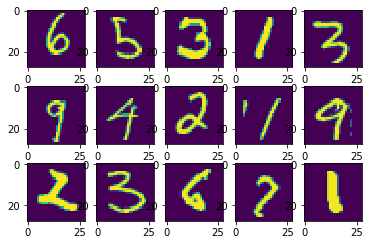

In [158]:
rows = 3
cols = 5

fig=plt.figure()

for i in range (rows*cols):
    fig.add_subplot(rows, cols, i+1)
    plt.imshow(x_train[randint(0, 60000)])

plt.show()

Every images are correctly identified except the image at the left bottom (2) which is more difficult to identify

In [159]:
#reshape data to fit model
x_train1 = x_train.reshape(60000,28,28,1) 
x_test1 = x_test.reshape(10000,28,28,1)

60 000 images, 28 pixels of weight, 28 pixels of height, 1 for grayscale (if color then 3)

In [160]:
x_train_normalized = x_train1/255.
x_test_normalized = x_test1/255.

In [161]:
onehot_encoder = OneHotEncoder(sparse=False)
#train set
y_train_reshap = y_train.reshape(len(y_train), 1)
onehot_encoded_train = onehot_encoder.fit_transform(y_train_reshap)

print(onehot_encoded_train.shape)
print(y_train[0])
#test set
y_test_reshap = y_test.reshape(len(y_test), 1)
onehot_encoded_test = onehot_encoder.transform(y_test_reshap)

print(onehot_encoded_test[0])
print(y_test[0])

(60000, 10)
5
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
7


In [162]:
#create model
model = keras.models.Sequential()
#add model layers
model.add(keras.layers.Conv2D(64, kernel_size=3, activation="relu", input_shape=(28,28,1)))
model.add(keras.layers.Conv2D(32, kernel_size=3, activation="relu"))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [163]:
hist = model.fit(x_train_normalized, onehot_encoded_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 93s 62ms/step - loss: 0.2263 - accuracy: 0.9297 - val_loss: 0.0744 - val_accuracy: 0.9790
Epoch 2/10
1500/1500 [==============================] - 101s 67ms/step - loss: 0.0989 - accuracy: 0.9689 - val_loss: 0.0585 - val_accuracy: 0.9821
Epoch 3/10
1500/1500 [==============================] - 102s 68ms/step - loss: 0.0776 - accuracy: 0.9751 - val_loss: 0.0496 - val_accuracy: 0.9860
Epoch 4/10
1500/1500 [==============================] - 102s 68ms/step - loss: 0.0672 - accuracy: 0.9785 - val_loss: 0.0477 - val_accuracy: 0.9862
Epoch 5/10
1500/1500 [==============================] - 103s 68ms/step - loss: 0.0609 - accuracy: 0.9804 - val_loss: 0.0415 - val_accuracy: 0.9875
Epoch 6/10
1500/1500 [==============================] - 104s 70ms/step - loss: 0.0573 - accuracy: 0.9825 - val_loss: 0.0399 - val_accuracy: 0.9878
Epoch 7/10
1500/1500 [==============================] - 104s 69ms/step - loss: 0.0506 - accuracy: 0.9832 - val_loss: 0.

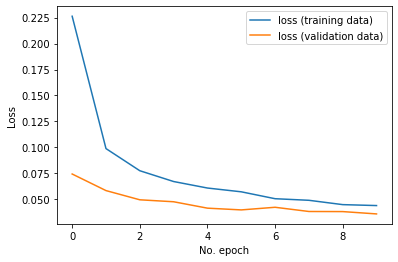

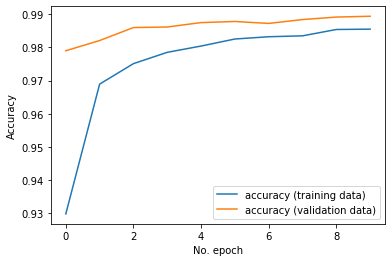

In [164]:
#fig, axs = plt.subplots(1,2)
#fig.suptitle('Vertically stacked subplots')

plt.figure(1)
plt.plot(hist.history['loss'], label='loss (training data)')
plt.plot(hist.history['val_loss'], label='loss (validation data)')
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend()
plt.show()

plt.figure(2)
plt.plot(hist.history['accuracy'], label='accuracy (training data)')
plt.plot(hist.history['val_accuracy'], label='accuracy (validation data)')
plt.ylabel('Accuracy')
plt.xlabel('No. epoch')
plt.legend()
plt.show()

In [167]:
model.save("C:/Users/Allard/Desktop/handwritten_model.h5")

In [168]:
prediction = model.predict(x_test_normalized)

In [171]:
pred = np.argmax(prediction, axis=1)


The prediction of each image (we take th highest probability).

The prediction by our model is 4
The true value is 4


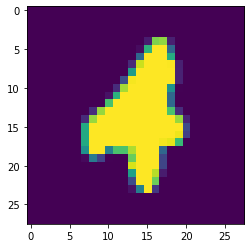

The prediction by our model is 7
The true value is 7


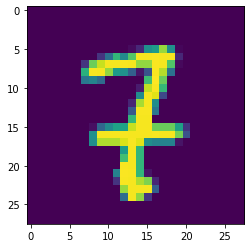

The prediction by our model is 2
The true value is 2


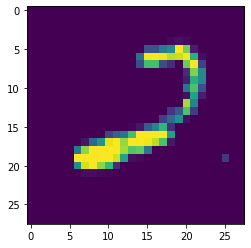

The prediction by our model is 2
The true value is 2


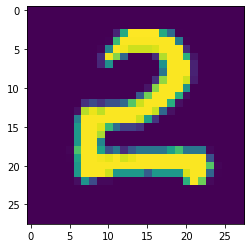

The prediction by our model is 8
The true value is 8


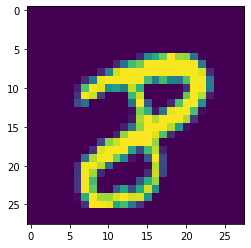

The prediction by our model is 0
The true value is 0


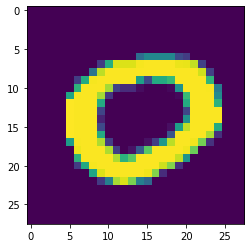

The prediction by our model is 4
The true value is 4


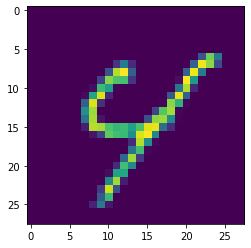

The prediction by our model is 2
The true value is 2


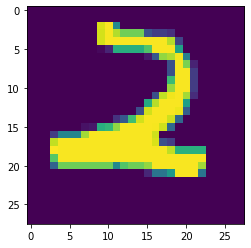

The prediction by our model is 3
The true value is 3


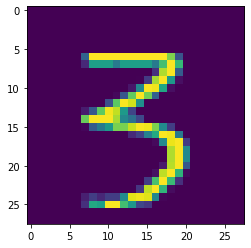

The prediction by our model is 3
The true value is 3


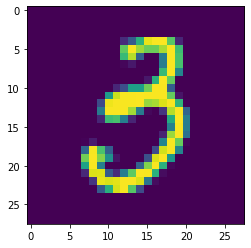

In [176]:
for i in range (10):
    rand = randint(0, 10000)
    plt.imshow(x_test[rand])
    print('The prediction by our model is {}'.format(np.argmax(prediction[rand])))
    print('The true value is {}'.format(y_test[rand]))
    plt.show()

In [173]:
print("The model accuracy on test set is {}".format(accuracy_score(y_test, pred)))

The model accuracy on test set is 0.9908
